<a href="https://colab.research.google.com/github/eklee0421/Data_Mining/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#tensorflow version은 2점대 사용
tf.__version__

'2.2.0-rc3'

In [3]:
#train_images와 test_images는 28*28 size = 문제
#train_labels와 test_labels은 손글씨의 숫자가 무엇인지 알려주는 것 = 정답
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
''' 
0부터 9까지 10개의 숫자에 대한 손글씨 data를
6만개의 data로 훈련 1만개의 data를 test
'''
print("train_images : ", train_images.shape)
print("train_lables : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_lables : ", test_labels.shape)

train_images :  (60000, 28, 28)
train_lables :  (60000,)
test_images :  (10000, 28, 28)
test_lables :  (10000,)


그림 속 숫자:  3


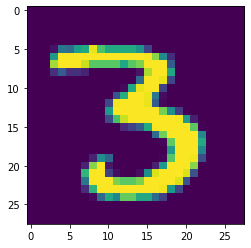

In [5]:
from matplotlib import pyplot as plt
plt.imshow(train_images[12])  #12번째 이미지 출력 - 28*28 pixel
print("그림 속 숫자: ", train_labels[12])

In [0]:
#reshape 함수를 통해서 훈련에 적합한 모양으로 만들어준다
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [0]:
'''현재 data는 28*28로, 한 픽셀이 00부터 FF까지 채워져있다 
   -> 이 수를 0부터 1 사이의 수로 만들어주기 위함!
   -> 이렇게 만들면 학습을 더 빨리 하고, local_minimum에 빠지게 될 가능성 줄인다'''

train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
#훈련 할 모델 만들기
#Conv2D()로 쌓고, MaxPooling2D 하는 것 반복 

model = models.Sequential()
#Conv2D(필터 수, 커널 사이즈, 활성화 함수, 들어가는 모양)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
#위의 output이 여기의 input으로 자동적으로 들어가므로 input 모양 따로 적어주지 않아도 된다
model.add(layers.Conv2D(64, (3,3), activation='relu')) #input_shape 생략 가능
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #마지막 output은 10개(0~9) 중 하나로 추측
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary() #현재 모델의 모양 출력
#한층 한층 쌓을 때마다 모양이 변하는 것을 확인 할 수 있다

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
#만든_모델.fit(이미지, 정답, 몇번 훈련 할 것인지) -> 훈련한다
model.fit(train_images, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 1s 9ms/step - loss: 0.5223 - accuracy: 0.8540
Epoch 2/5
118/118 [==============================] - 1s 8ms/step - loss: 0.1095 - accuracy: 0.9671
Epoch 3/5
118/118 [==============================] - 1s 8ms/step - loss: 0.0749 - accuracy: 0.9774
Epoch 4/5
118/118 [==============================] - 1s 8ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 5/5
118/118 [==============================] - 1s 8ms/step - loss: 0.0465 - accuracy: 0.9854


In [11]:
#model.evaluate(test_images, test_labels)
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print(test_acc) #정확도

313/313 - 1s - loss: 0.0383 - accuracy: 0.9881
0.988099992275238


In [12]:
from google.colab import drive
drive.mount('/gdrive') 
#링크 누른 뒤 사용하고 있는 아이디 로그인
#코드 복사해서 붙여넣고 엔터 치기
#외부에서 파일 가져올 경우 경로를 다음과 같이 설정
#/gdrive/My Drive/(하위 경로)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
